In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
tips = sns.load_dataset('tips')

<Axes: xlabel='tip', ylabel='total_bill'>

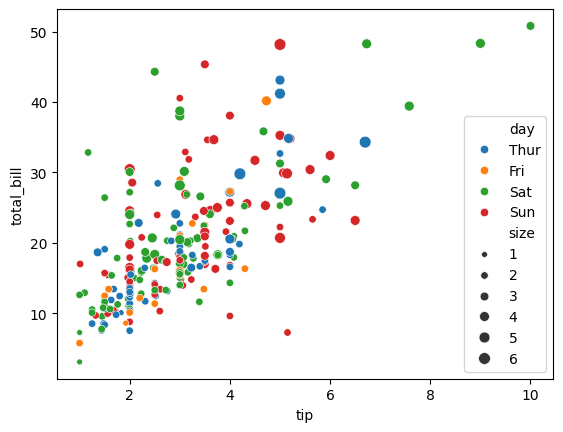

In [ ]:
sns.scatterplot(x='tip', y='total_bill', hue='day', size='size', data=tips)

<Axes: xlabel='tip', ylabel='Count'>

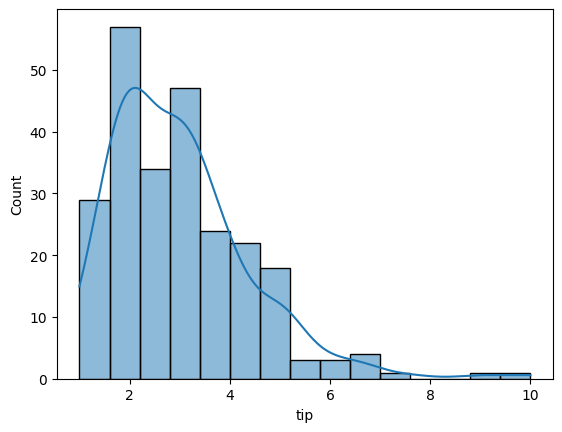

In [ ]:
sns.histplot(tips['tip'], kde=True, bins=15)

/tmp/ipython-input-16-3619086980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=tips, palette='YlGnBu')


<Axes: xlabel='sex', ylabel='tip'>

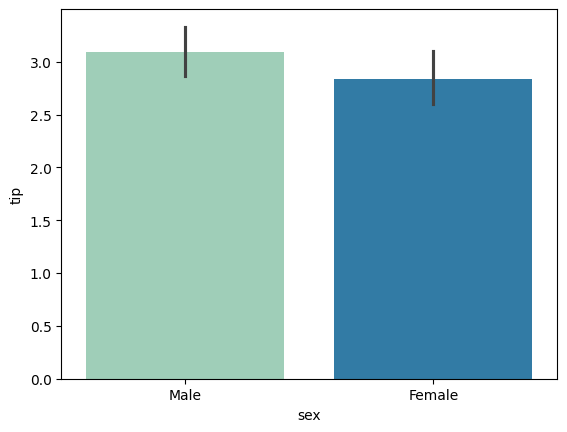

In [ ]:
sns.barplot(x='sex', y='tip', data=tips, palette='YlGnBu')

<Axes: xlabel='day', ylabel='tip'>

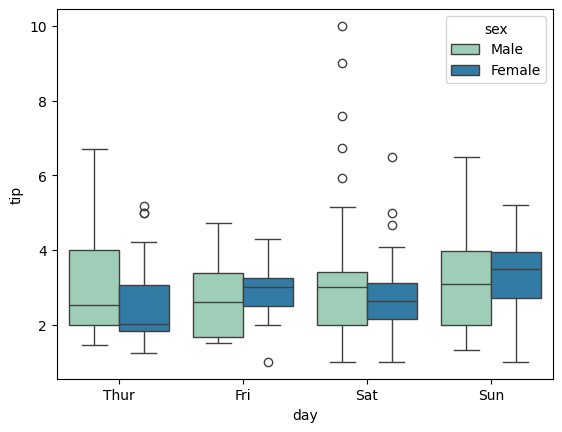

In [ ]:
sns.boxplot(x='day', y='tip', data=tips, hue='sex', palette='YlGnBu')

<Axes: xlabel='day', ylabel='tip'>

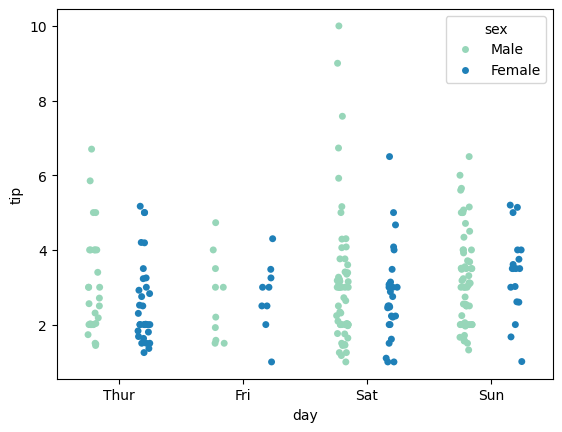

In [ ]:
sns.stripplot(x='day', y='tip', data=tips, hue='sex', palette='YlGnBu', dodge=True)

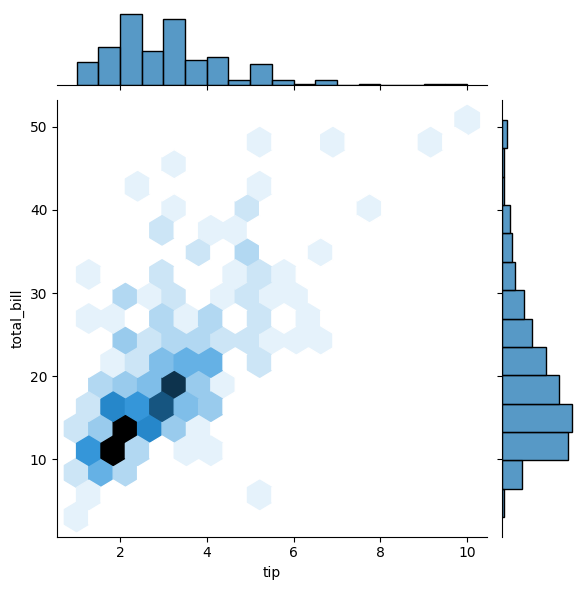

In [ ]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind='hex')

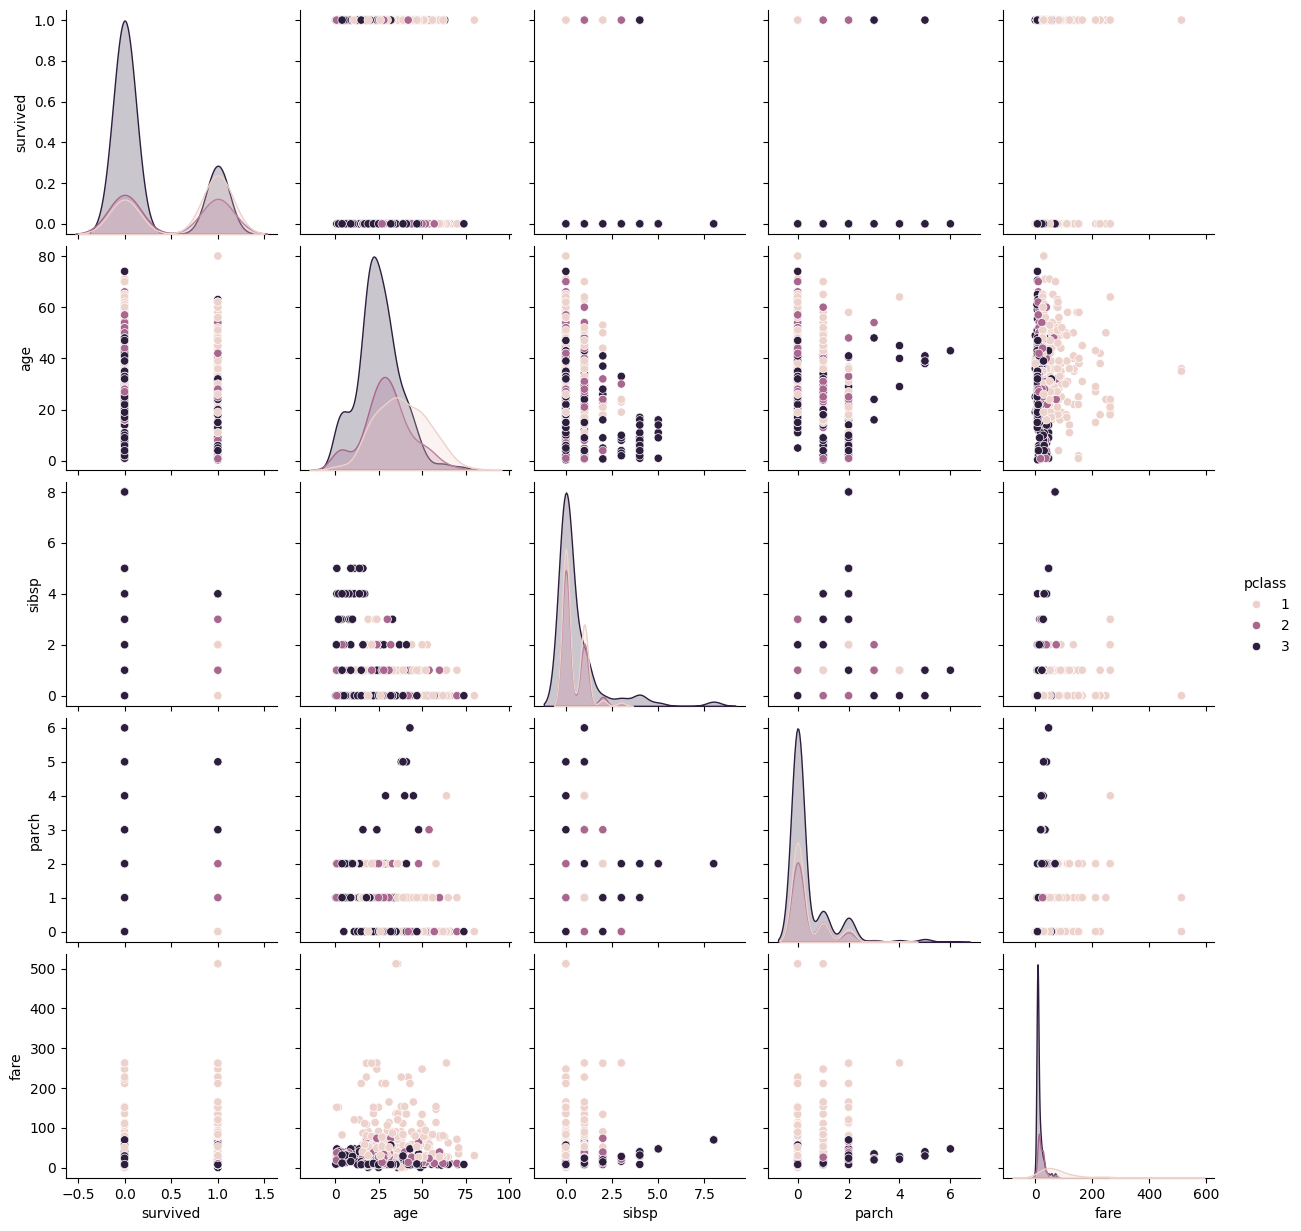

In [ ]:
  titanic = sns.load_dataset('titanic')
sns.pairplot(titanic.select_dtypes(['number']), hue='pclass')

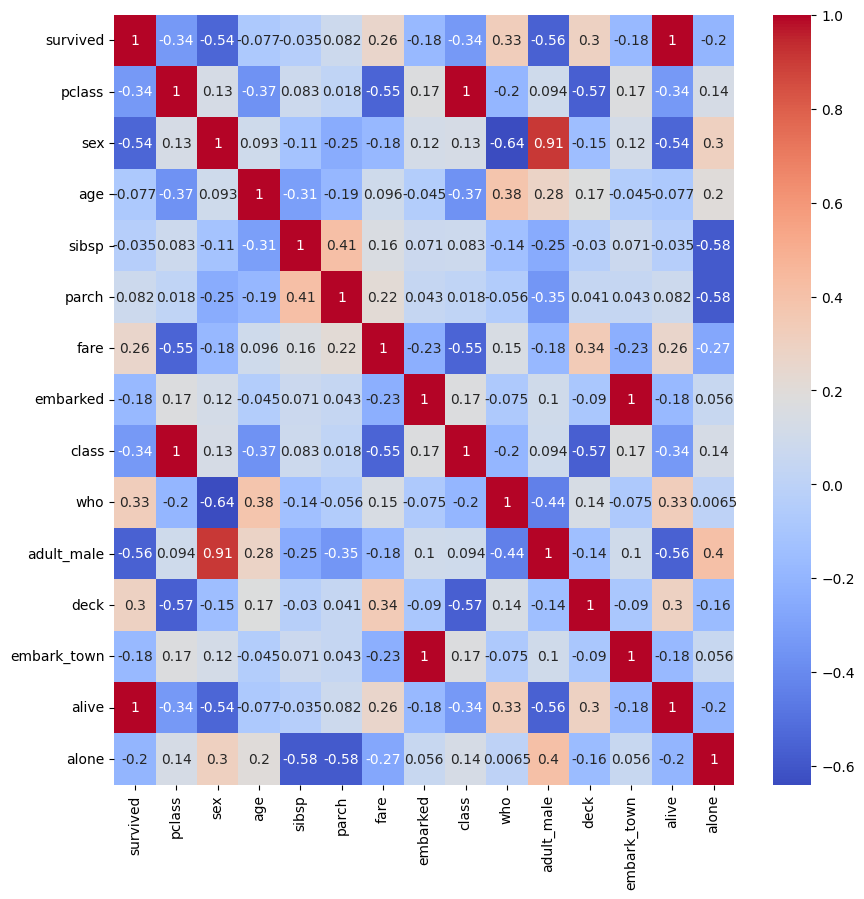

In [ ]:
def categorizer(*args):
  for opt in args:
    titanic[opt] = titanic[opt].astype('category').cat.codes

categorizer('sex', 'embarked', 'who', 'class', 'deck', 'embark_town')
titanic['alive'] = titanic['alive'].map({'yes':1, 'no':0})
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm').figure.set_size_inches(10, 10)

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,-1,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,-1,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,-1,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,-1,2,0,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,1,2,1,True
888,0,3,0,NaN,1,2,23.4500,2,2,2,False,-1,2,0,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,2,0,1,True


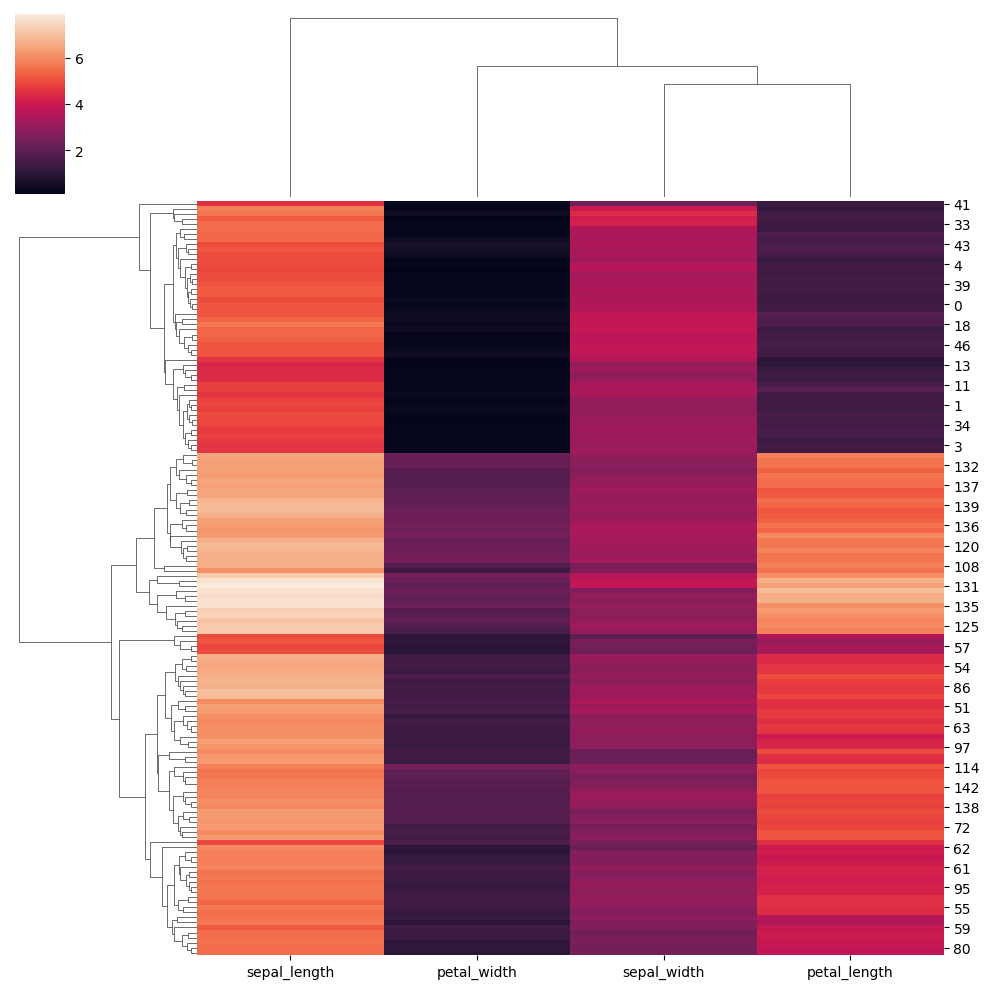

In [ ]:
iris = sns.load_dataset('iris')
sns.clustermap(iris.drop('species', axis=1))

<Axes: xlabel='species', ylabel='petal_length'>

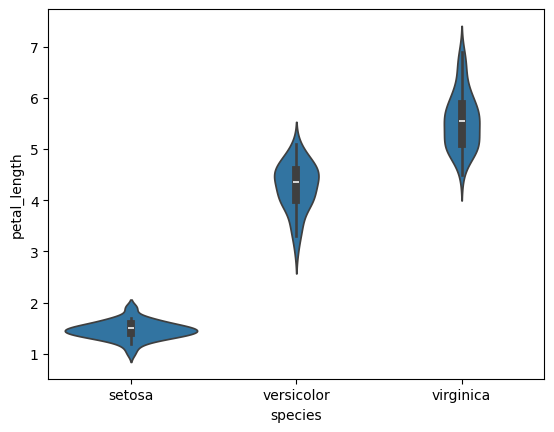

In [ ]:
sns.violinplot(x='species', y='petal_length', data=iris)

# MOVING ON TO **METRICS**


In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np

In [ ]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [ ]:
metrics.accuracy_score(actual, predicted)

0.811

In [ ]:
metrics.precision_score(actual, predicted)

0.89

In [ ]:
metrics.f1_score(actual, predicted)

0.8944723618090452

In [ ]:
metrics.recall_score(actual, predicted)

0.898989898989899

In [ ]:
metrics.confusion_matrix(actual, predicted)

array([[ 10,  99],
       [ 90, 801]])

Text(0, 0.5, 'True Positive Rate')

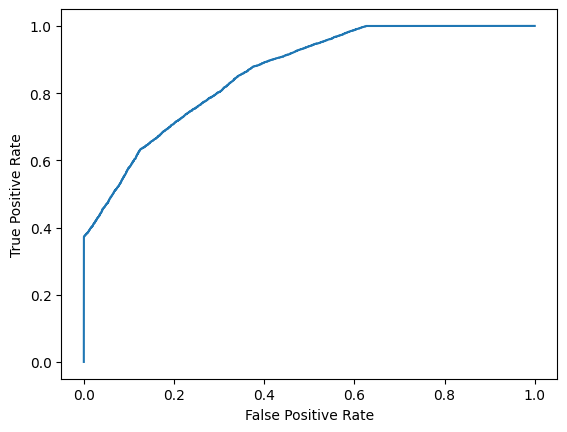

In [ ]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)
y = np.array([0] * n + [1] * n)
fpr, tpr, thresholds = metrics.roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')